# Indian Liver Patients Dataset

# Exploratory Data Analysis and applying supervised learning algorithms on Liver Patients Dataset

### Import Python Libraries

In [112]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="darkgrid", color_codes=True)

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

## Problem Statement :
## Classify the patients as having liver problems and not having liver problems based on 10 features related to liver

## About the Data:

   __Context and Content__
- Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs.
- This data set contains 10 variables that are age, gender, total Bilirubin, direct Bilirubin, total proteins, albumin, A/G ratio, SGPT, SGOT and Alkphos.
- This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.Any patient whose age exceeded 89 is listed as being of age "90".

__Acknowledgements__
- This dataset was downloaded from the UCI ML Repository:

- Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

### Load Data and read the data as a data frame

In [113]:
df = pd.read_csv("datasets_2607_4342_indian_liver_patient.csv")

### Shape of the data

In [114]:
df.shape

(583, 11)

### Data type of each attribute

In [115]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Check that data is read correctly using head, tail and sample

In [116]:
df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [117]:
df.tail(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [118]:
df.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
552,45,Male,0.6,0.1,196,29,30,5.8,2.9,1.00,1
370,54,Female,22.6,11.4,558,30,37,7.8,3.4,0.80,1
383,60,Female,1.4,0.7,159,10,12,4.9,2.5,1.00,2
197,26,Female,0.6,0.2,142,12,32,5.7,2.4,0.75,1
27,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.20,1


### Info on column name, count of records, not-null/null, datatype, count of datatypes and memory usage of columns

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Input variables

In [120]:
print(df.drop('Dataset', axis=1).dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
dtype: object


### Target variable

In [121]:
print("Dataset : values are {}, dtype is {}".format(df['Dataset'].unique(),
                                                          df['Dataset'].dtype))

Dataset : values are [1 2], dtype is int64


In [122]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

#### Description of The Target Variables
- __Dataset__	       Dataset: field used to split the data into two sets (patient with liver disease, or no disease)
- __"1" stands for LiverPatients and "2" stands for NonLiverPatients.__

### Null Values

In [123]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [124]:
print("\nThere are 4 Null/Missing values in the dataset\n")


There are 4 Null/Missing values in the dataset



### Drop NaN values

In [125]:
df[df['Albumin_and_Globulin_Ratio'].isna()]    

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [126]:
# Drop Nan values as there are only 4 NaN's
df.dropna(inplace=True)

In [127]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### Negative values

In [128]:
(df.drop('Gender', axis=1) < 0).sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [129]:
print("\nThere are no Negative values in the dataset\n")


There are no Negative values in the dataset



### Duplicated data

In [130]:
df.duplicated().sum()

13

In [131]:
df[df.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [132]:
print("\nThere are 13 duplicate records in the dataset\n")


There are 13 duplicate records in the dataset



In [133]:
#Removing Duplicate Rows

df.drop_duplicates(inplace=True)

In [134]:
df.reset_index(drop=True, inplace=True)

In [135]:
#check changed shape
df.shape

(566, 11)

In [136]:
#check columns
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### numerical columns

- There are 9 numerical columns.Though Dataset is numeric, it is the dependent variable for classification and is considered categorical

In [137]:
num_columns = ['Age','Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
               'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 
               'Albumin_and_Globulin_Ratio']

### categorical columns

- Gender is the only categorical independent variable.Dataset is categorical and is the target variable

In [138]:
cat_columns = ['Gender','Dataset']

### 5 point summary of numerical attributes

In [235]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,566.0,44.886926,16.274893,4.0,33.0,45.00,58.00,90.0
Gender,566.0,0.756184,0.429763,0.0,1.0,1.00,1.00,1.0
Total_Bilirubin,566.0,3.338869,6.286728,0.4,0.8,1.00,2.60,75.0
Direct_Bilirubin,566.0,1.505830,2.841485,0.1,0.2,0.30,1.30,19.7
Alkaline_Phosphotase,566.0,292.567138,245.936559,63.0,176.0,208.00,298.00,2110.0
Alamine_Aminotransferase,566.0,80.143110,182.044881,10.0,23.0,35.00,60.75,2000.0
Aspartate_Aminotransferase,566.0,109.892226,291.841897,10.0,25.0,41.00,87.00,4929.0
Total_Protiens,566.0,6.494876,1.087512,2.7,5.8,6.60,7.20,9.6
Albumin,566.0,3.145583,0.795745,0.9,2.6,3.10,3.80,5.5
Albumin_and_Globulin_Ratio,566.0,0.948004,0.319635,0.3,0.7,0.95,1.10,2.8


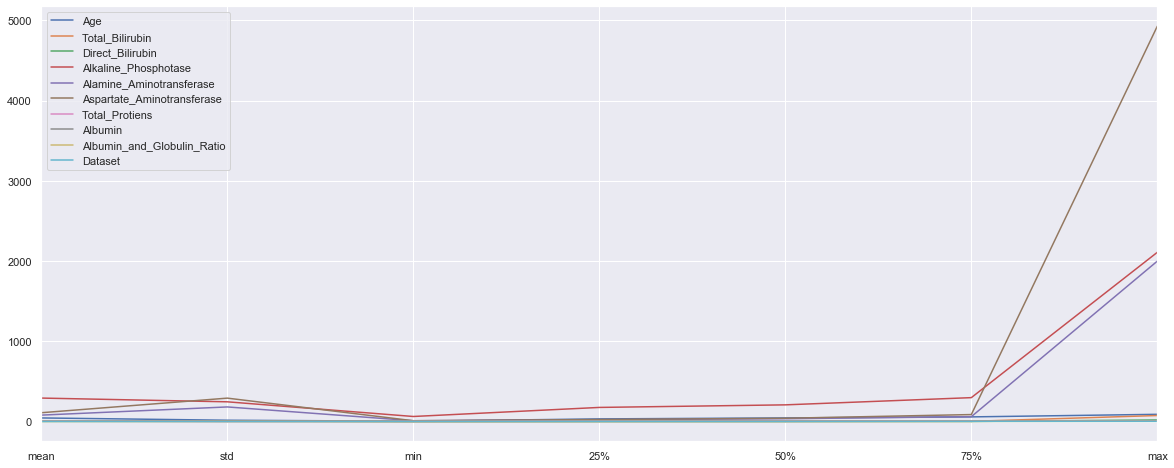

In [140]:
df.describe().drop('count',axis=0).plot(figsize=(20,8))
plt.show()

### Outliers analysis of numerical columns

In [141]:
#Identifying Outliers in Numeric columns using IQR (Inter Quartile Range) and Q1 (25% Quantile), Q3(75% Quantile).

def identify_outliers(col):    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    return(col, q1, q3, iqr, lower_limit, upper_limit)

In [142]:
#Checking for Outliers and identifying them by calling identify_outliers() function.
#observations below Q1- 1.5*IQR, or those above Q3 + 1.5*IQR  are defined as outliers.

for col in num_columns :
    col, q1, q3, iqr, lower_limit, upper_limit = identify_outliers(col)
    print("\nColumn name : {}\n Q1 = {} \n Q3 = {}\n IQR = {}".format(col, q1, q3, iqr))
    print(" Lower limit = {}\n Upper limit = {}\n".format(lower_limit, upper_limit))
    outlier_count = len(df.loc[(df[col] < lower_limit) | (df[col] > upper_limit)])
    if outlier_count != 0 :
        print(outlier_count, "OUTLIERS ARE PRESENT in {} column.".format(col))
        print("Outlier datapoints in {} column are:".format(col))
        print(np.array(df.loc[(df[col] < lower_limit) | (df[col] > upper_limit)][col]))
    else:
        print("OUTLIERS ARE NOT PRESENT in {} column\n".format(col))


Column name : Age
 Q1 = 33.0 
 Q3 = 58.0
 IQR = 25.0
 Lower limit = -4.5
 Upper limit = 95.5

OUTLIERS ARE NOT PRESENT in Age column


Column name : Total_Bilirubin
 Q1 = 0.8 
 Q3 = 2.6
 IQR = 1.8
 Lower limit = -1.9000000000000001
 Upper limit = 5.300000000000001

83 OUTLIERS ARE PRESENT in Total_Bilirubin column.
Outlier datapoints in Total_Bilirubin column are:
[10.9  7.3  6.8  6.2 14.2  6.8 18.4  8.9  5.7  6.8  8.6  5.8  6.6  5.8
  7.3 12.7 15.9 18.  23.  22.7  5.8 11.3  5.9  8.7 11.  11.5  5.8 75.
 22.8  8.9 14.1 14.8 10.6  8.   6.3  5.8 27.2 30.5 16.4 14.5 18.5 23.2
  7.1  6.7 22.6  7.5  7.3  8.2 10.9  7.4 23.3  7.9  6.8  7.1  6.7 19.8
 30.5 32.6 17.7 18.4 20.  26.3  9.4 30.8 19.6 15.8  5.5 20.2 27.7 11.1
 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.  15.  12.7]

Column name : Direct_Bilirubin
 Q1 = 0.2 
 Q3 = 1.3
 IQR = 1.1
 Lower limit = -1.4500000000000002
 Upper limit = 2.95

80 OUTLIERS ARE PRESENT in Direct_Bilirubin column.
Outlier datapoints in Direct_Bilirubin 

## Visualizing Outliers in dataset using boxplot


		Boxplot to check the presence of outliers in numeric columns



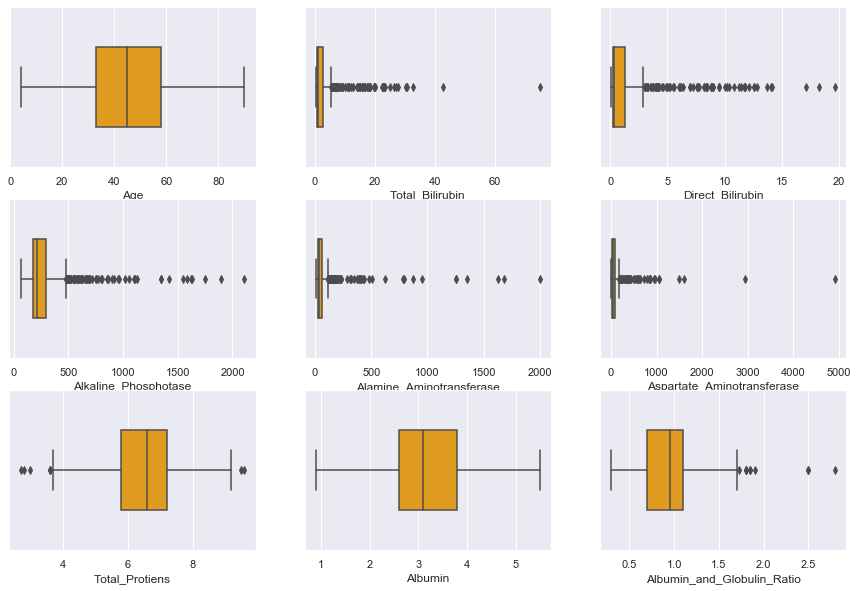

In [237]:
#Visualizing Outliers in dataset using boxplot

print('\n\t\tBoxplot to check the presence of outliers in numeric columns')
print('\t\t==============================================================\n')
#num_columns = ['Age','Income', 'CCAvg', 'Mortgage']
fig, ax = plt.subplots(3,3,figsize=(15, 10))
for col,subplot in zip(num_columns,ax.flatten()) :
    sns.boxplot(x=df[[col]], width=0.5, color='orange', ax=subplot)
    #subplot.set_title('Boxplot for {}'.format(col))
    subplot.set_xlabel(col)    
plt.show()


### Observations on outlier analysis of numerical columns:
- Maximum number of outliers, which is 83 is seen in Total_Bilirubin column and is extremely right skewed
- Age and Albumin columns do not have any outliers
- Total_Protiens has 8 outliers and Albumin_and_Globulin_Ratio has 10 outliers
- Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase columns also have huge number of outliers and are extremely right skewed

In [236]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

## Variance in numerical columns

In [144]:
df[num_columns].var()

Age                             264.872147
Total_Bilirubin                  39.522947
Direct_Bilirubin                  8.074037
Alkaline_Phosphotase          60484.791060
Alamine_Aminotransferase      33140.338775
Aspartate_Aminotransferase    85171.692789
Total_Protiens                    1.182682
Albumin                           0.633211
Albumin_and_Globulin_Ratio        0.102167
dtype: float64

## Visualizing variance of numerical columns through lineplot

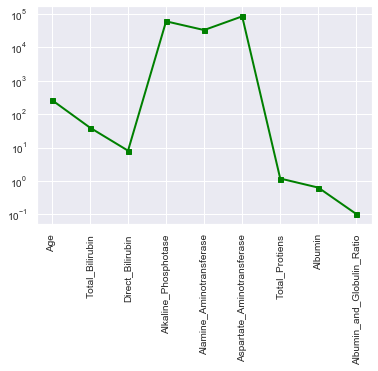

In [145]:
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.plot(df[num_columns].var(), color='green', marker='s',linewidth=2, markersize=5)
plt.yscale('log')
plt.show()

### Observations on variance of numerical columns
- Variance in all the numerical columns vary exponentially
- Variance in Albumin_and_Globulin_Ratio column is very less with a value of 0.1
- Variance in Aspartate_Aminotransferase column is very high and is close to 10^5

# Univariate Analysis

## Visualizing Distribution of numerical columns through distplots

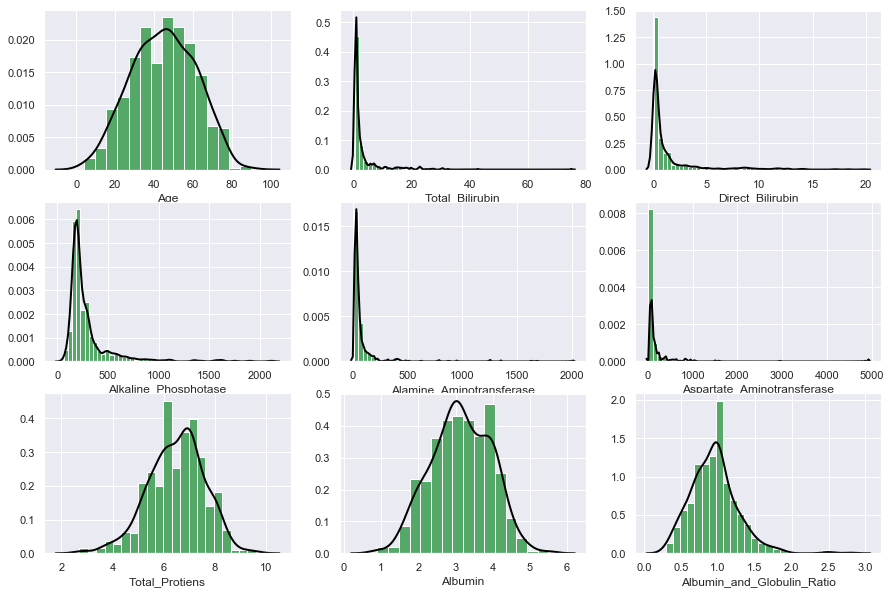

In [146]:
fig, ax = plt.subplots(3,3,figsize=(15, 10))
for col,subplot in zip(num_columns,ax.flatten()) :
    ax =sns.distplot(df[col], ax=subplot, hist_kws={'color':'g','alpha':1}, kde_kws={'color':'black', 'lw':2})

### Observations on univariate analysis of numerical columns:
 - Distplots for all the columns show that the columns Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase and Albumin_and_Globulin_Ratio are extremely right skewed with long tails to the right side of the distribution.For all these columns, the mean is greater than the median
 - Distribution of Age column is nearly normal and has very less skewness in both the tails.Mean and median are approximately equal in Age column
 - Distribution for Total_Protiens, Albumin and Albumin_and_Globulin_Ratio columns is also nearly normal.The mean and median meadin for these columns is also approximately equal

## Visualizing value counts of categorical columns through countplot

In [147]:
# Apart from Dataset which is the Target column there is only one other categorical column, Gender
# Value counts and distribution of Gender column

df.Gender.value_counts()

Male      428
Female    138
Name: Gender, dtype: int64

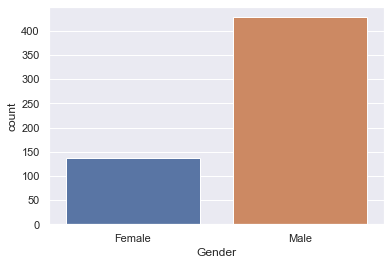

In [148]:
ax = sns.countplot(df.Gender)

### Observations on univariate analysis of categorical columns:
- 428 liver patients (76%) are male and 138 patients (24%) are female

### Target column distribution

In [149]:
# The Target column is 'Dataset'.
# Value counts and distribution of Target column

In [150]:
df.groupby(by='Dataset').count()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,,
1,404,404,404,404,404,404,404,404,404,404
2,162,162,162,162,162,162,162,162,162,162


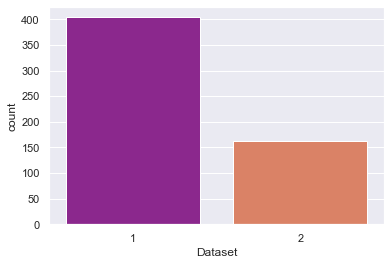

In [151]:
sns.countplot(df['Dataset'], palette = 'plasma')
plt.show()

### Observations on value counts of Target column:
1. __A status of '1' refers to a 'Liver Patient'.__
2. Among the 566 Patient's data, 404 customers (= 71%) are Liver patients
3. __A status of '2' refers to a 'Non Liver Patient'.__
4. Among the 566 Patient's data, 162 customers (= 29%) are Not Liver patients

## Visualizing frequency of each feature column by target column

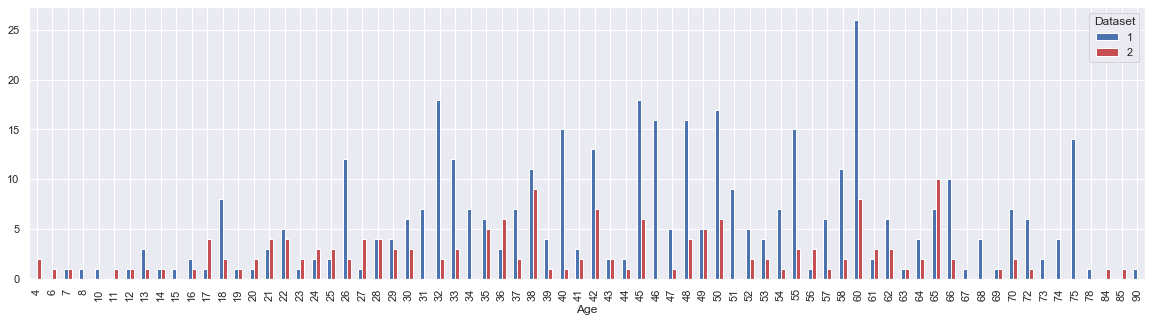

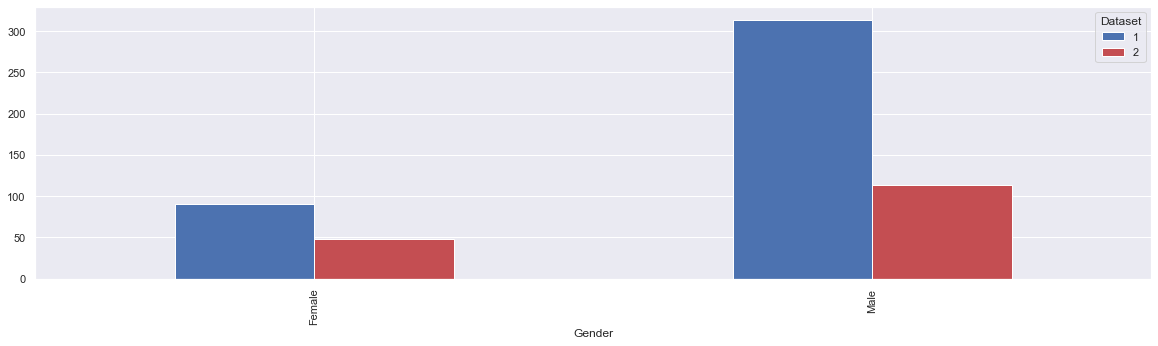

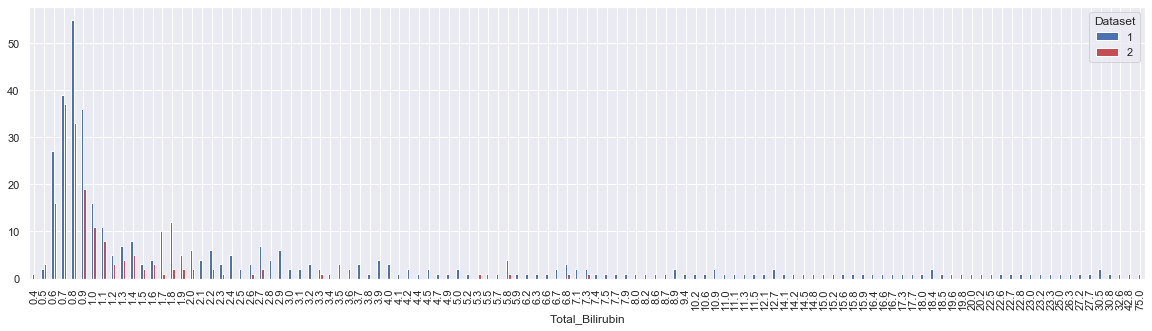

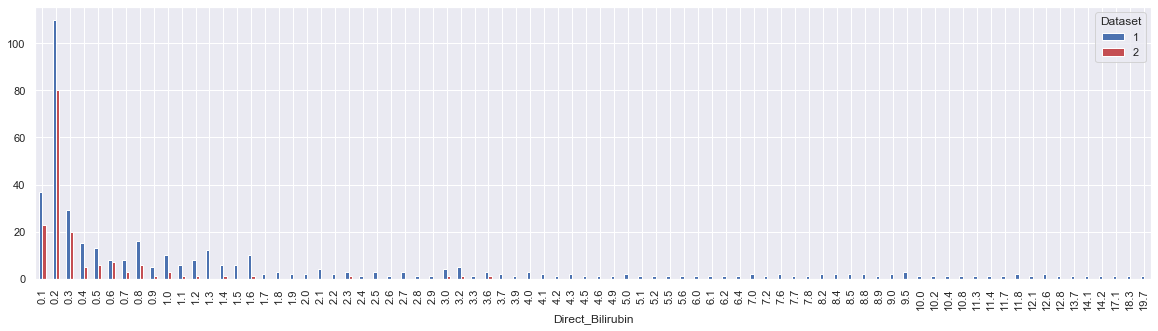

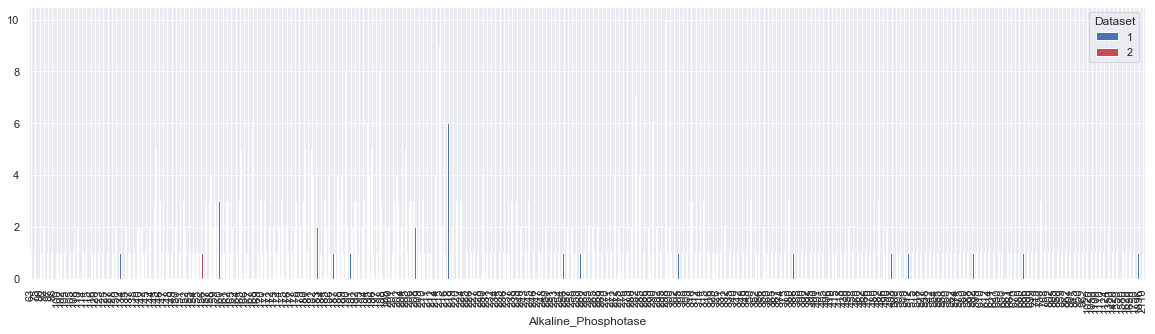

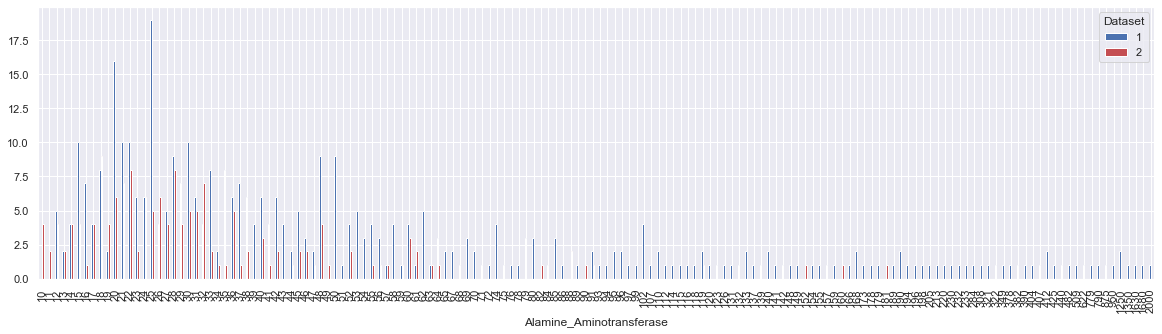

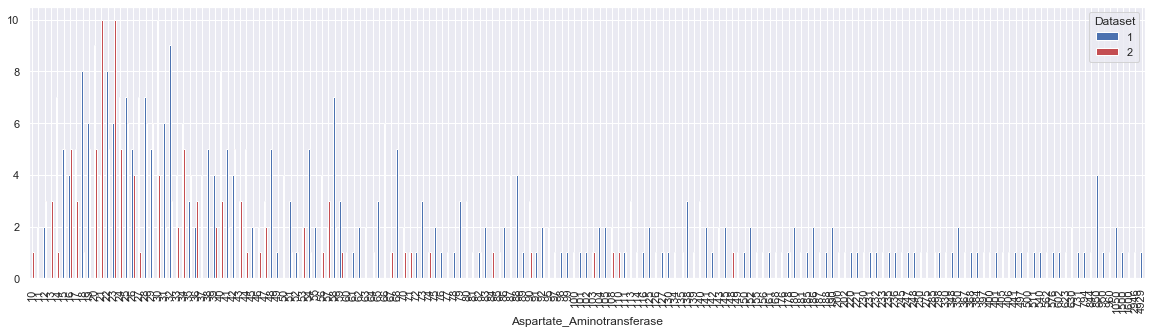

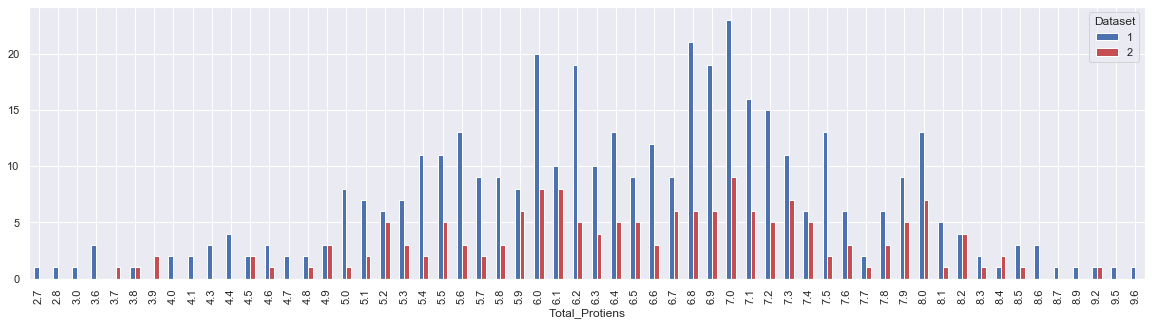

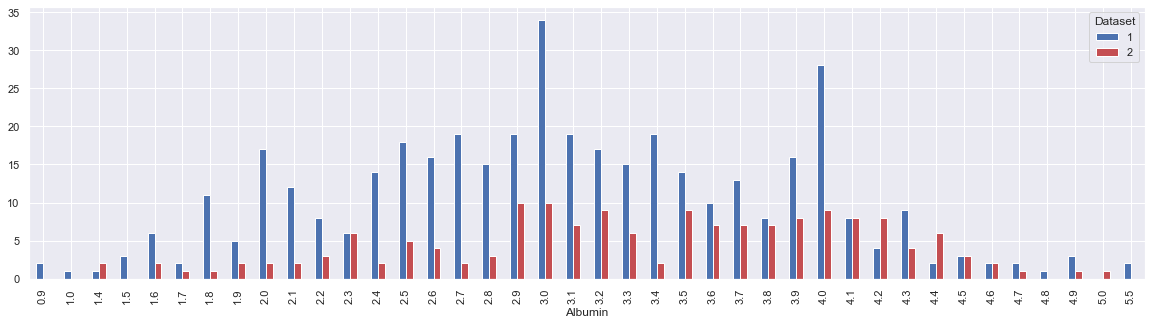

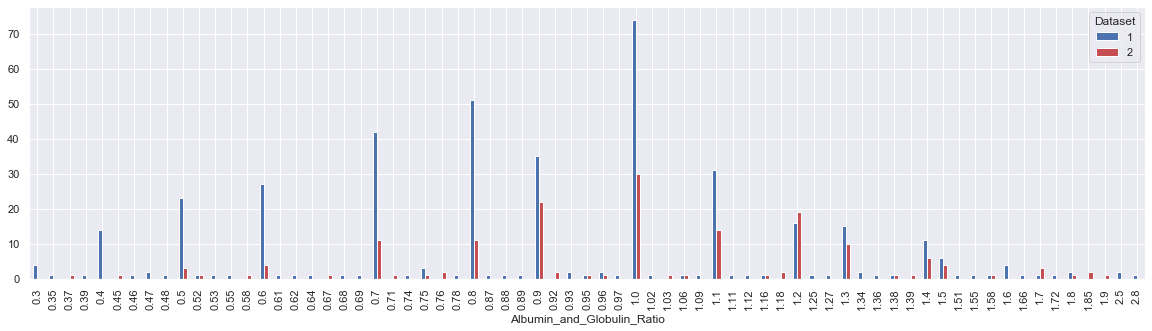

In [152]:
for col in df.drop('Dataset', axis=1).columns :
    pd.crosstab(df[col], df['Dataset']).plot(kind='bar',color=('b', 'r'), figsize=(20,5))

### Observations on distribution of Target column:
- Liver patients with 60 years of age are the maximum
- Most of the liver Patients are in the age group of 32 to 60 years
- Most of the liver patients are are male
- People with Total_Bilirubin  value less than 1.0 are the most having a liver disease.So, we can say that, Total_Bilirubin is an important feature which decides the health of liver
- People with Direct_Bilirubin value of 0.2 and in general people with Direct_Bilirubin value less than 1.6 are having liver disease, which also tells that Direct_Bilirubin is also an important factor which decides liver health
- The plots for Total_Proteins, Albumin and Albumin_and_Globulin_ratio do not reveal any feature importance, because people with both high values and low values are seen having a liver disease

# Bivariate Analysis

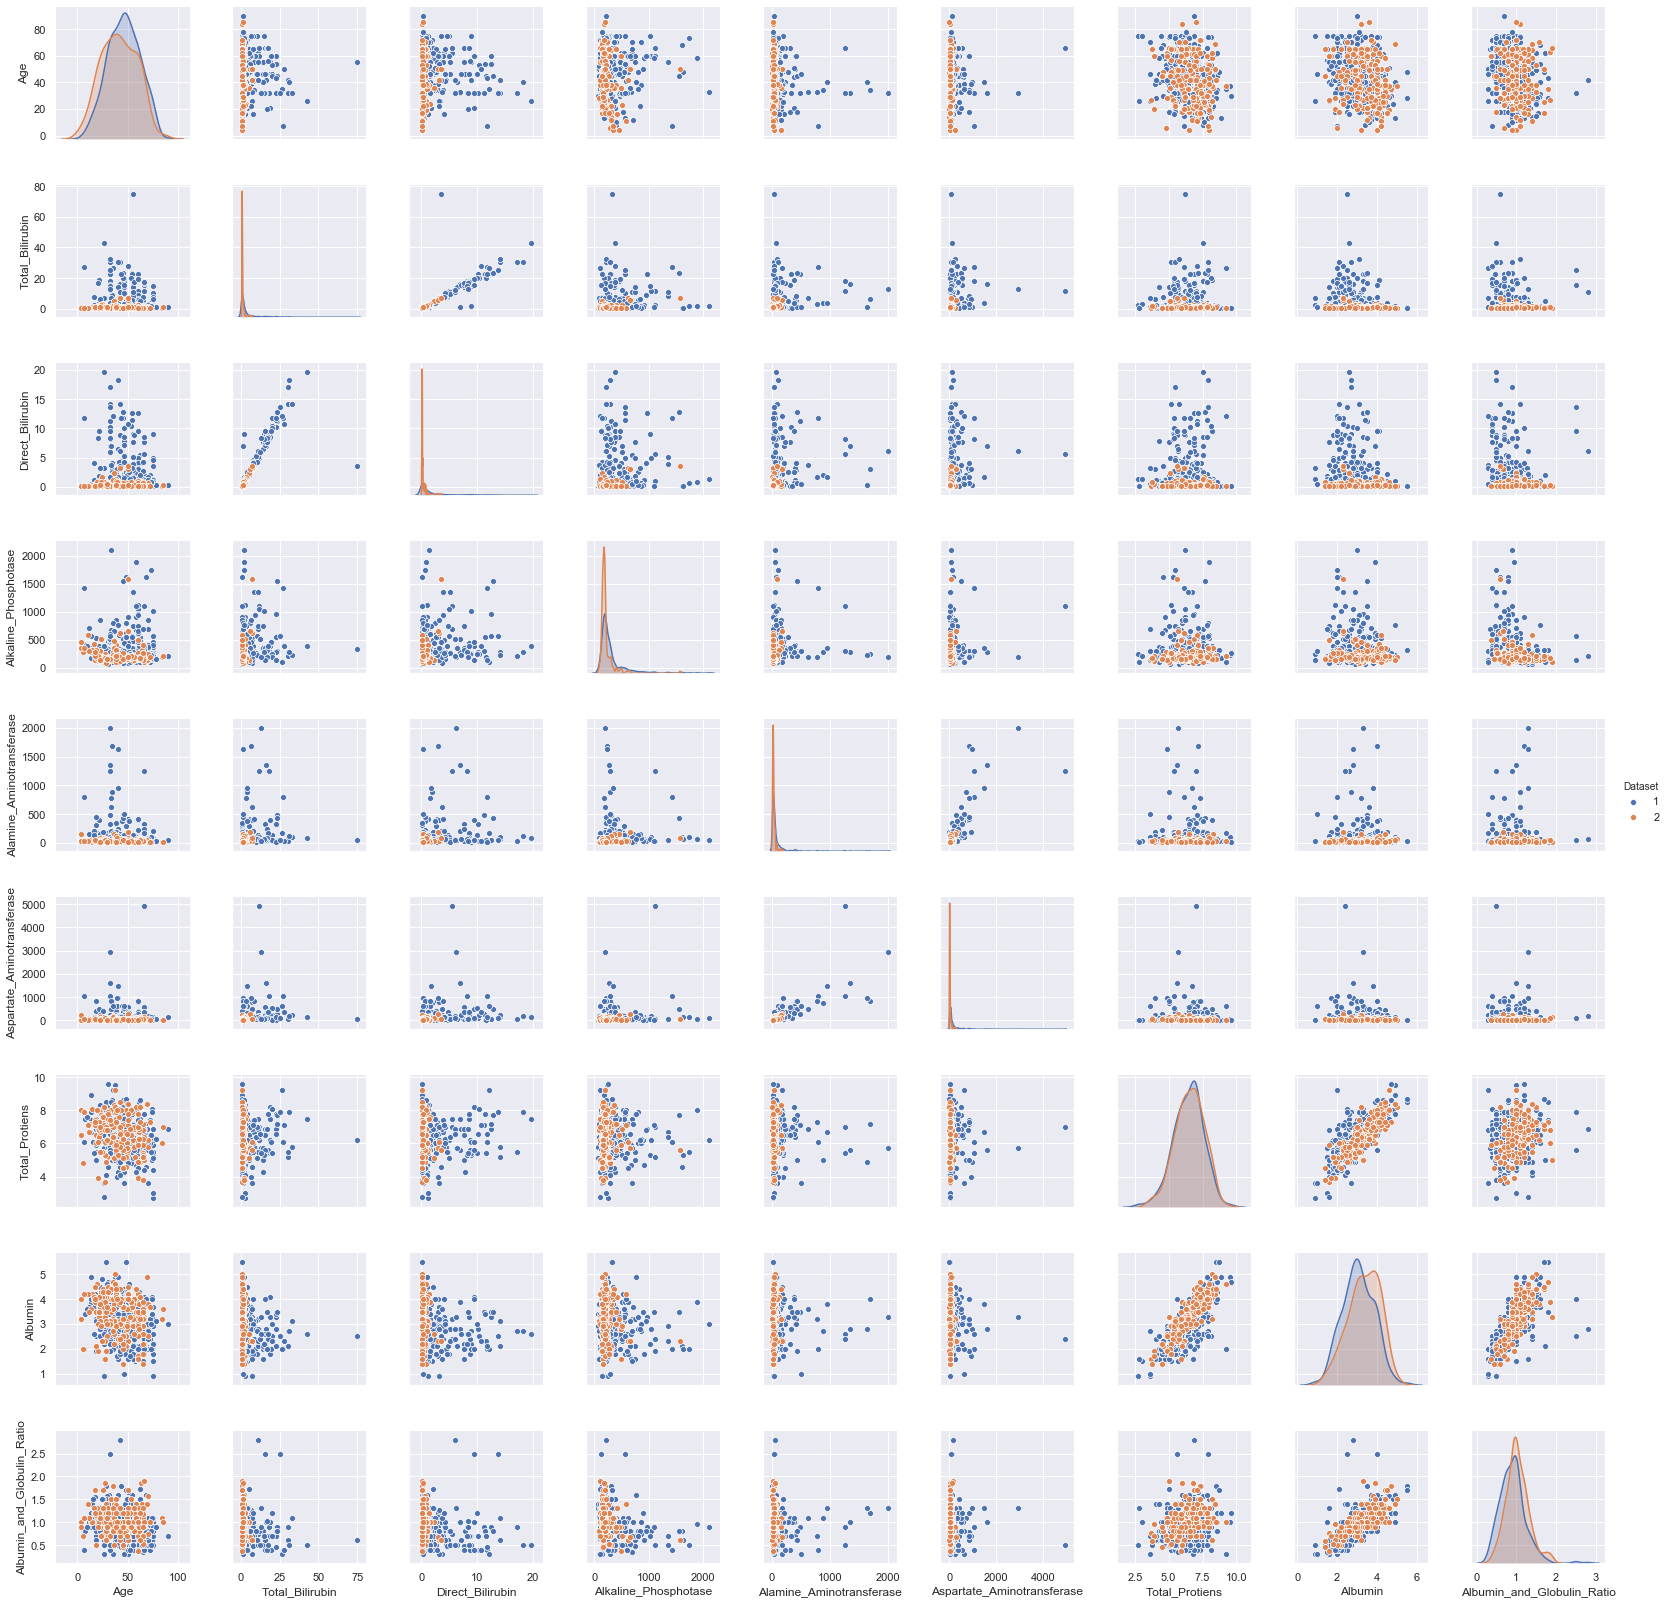

In [153]:
sns.pairplot(vars=df.drop(['Gender', 'Dataset'], axis=1).columns,hue='Dataset',data=df)
plt.show()

### Observations on bivariate analysis using pairplot:
- From the pairplot we can see that the columns Total_Bilirubin and Direct_Bilirubin, Alamine_Aminotransferase and Aspartate_Aminotransferase, Total_Protiens and Albumin, Total_Protiens and Albumin_and_Globulin_Ratio, Albumin and Albumin_and_Globulin_Ratio show a positive correlation and the correlation appers to be strong
- The formation of two good clusters is evident from the KDE plots alng the diagnol

## Correlation between numerical columns

In [155]:
#Dropping categorical column and target for finding correlation
corr = df[num_columns].corr()
corr.style.background_gradient(cmap='YlGnBu')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1,0.0107041,0.00626803,0.0800845,-0.0843185,-0.0173518,-0.195893,-0.269448,-0.215967
Total_Bilirubin,0.0107041,1,0.873975,0.205286,0.216776,0.238167,-0.00842314,-0.223979,-0.20774
Direct_Bilirubin,0.00626803,0.873975,1,0.233653,0.236731,0.257965,-0.000734903,-0.23065,-0.201519
Alkaline_Phosphotase,0.0800845,0.205286,0.233653,1,0.125917,0.166609,-0.0286231,-0.166287,-0.236251
Alamine_Aminotransferase,-0.0843185,0.216776,0.236731,0.125917,1,0.791754,-0.0351038,-0.0268904,-0.00652533
Aspartate_Aminotransferase,-0.0173518,0.238167,0.257965,0.166609,0.791754,1,-0.0221141,-0.0848208,-0.0728989
Total_Protiens,-0.195893,-0.00842314,-0.000734903,-0.0286231,-0.0351038,-0.0221141,1,0.7838,0.234576
Albumin,-0.269448,-0.223979,-0.23065,-0.166287,-0.0268904,-0.0848208,0.7838,1,0.687438
Albumin_and_Globulin_Ratio,-0.215967,-0.20774,-0.201519,-0.236251,-0.00652533,-0.0728989,0.234576,0.687438,1


## Visualizing Correlation between numerical columns through Heat map

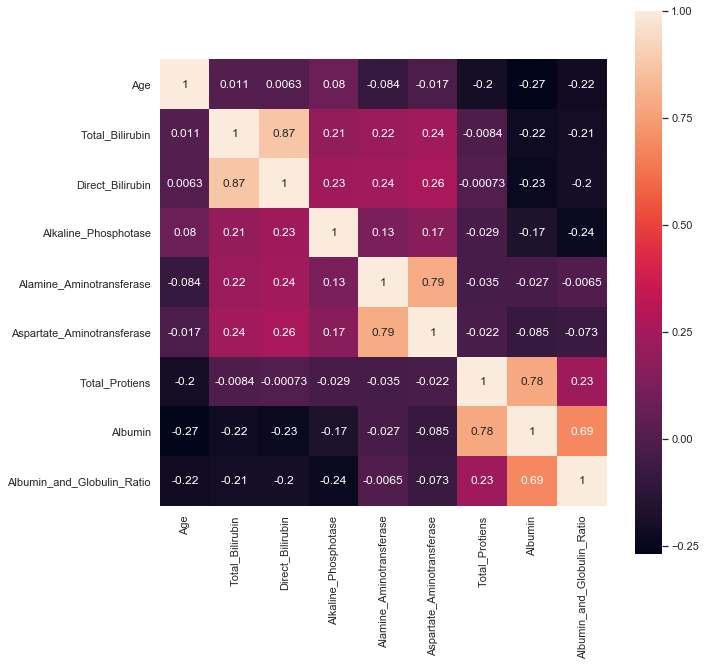

In [156]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True)
plt.show()

### Observations on Correlation between numerical columns:
- Total_Bilirubin and Direct_Bilirubin columns are having a very strong correlation of 0.87
- Alamine_Aminotransferase and Aspartate_Aminotransferase columns also have a strong correlation of 0.79
- Albumin and Total_Protien columns also have a good correlation of 0.78
- Albumin also has a correlation of 0.69 with Albumin_and_Globulin_Ratio

# Implementing KNN, Logistic and Naïve Bayes Classification models

In [157]:
le = LabelEncoder()

In [158]:
df['Gender'] = le.fit_transform(df['Gender'])

In [159]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [160]:
df['Gender'].value_counts()

1    428
0    138
Name: Gender, dtype: int64

### Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [161]:
X = df.drop('Dataset',axis=1)
y = df['Dataset']

In [162]:
print('Shape of Feture-set : ', X.shape)
print('Shape of Target-set : ', y.shape)

Shape of Feture-set :  (566, 10)
Shape of Target-set :  (566,)


### Split the data as train set and test set with a ratio of 70:30.

In [163]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.30, random_state=7)

In [164]:
print("Training Set Shape:\nFeatures : {0}  Target : {1}\n".format(X_train.shape, y_train.shape))
print("Test Set Shape:\nFeatures : {0}  Target : {1}".format(X_test.shape, y_test.shape))

Training Set Shape:
Features : (396, 10)  Target : (396,)

Test Set Shape:
Features : (170, 10)  Target : (170,)


### Standardize the training dataset and test dataset

In [165]:
#Standardize using zscore normalization method
#Training set scaled with zscores

X_trainZ = zscore(X_train)

In [166]:
#Test set scaled with zscores

X_testZ = zscore(X_test)

In [167]:
print(X_trainZ.mean(), X_trainZ.std())

-7.222056847056574e-17 1.0


In [168]:
print(X_testZ.mean(), X_testZ.std())

7.575639462148127e-17 1.0


In [169]:
#Standardization using Standard Scaler class of sklearn.preprocessing module

scaler = StandardScaler().fit(X_train)

In [170]:
scaler.mean_

array([ 44.8510101 ,   0.73989899,   3.16969697,   1.46035354,
       294.72727273,  85.8030303 , 124.12373737,   6.4969697 ,
         3.14747475,   0.95080808])

In [171]:
scaler.var_

array([2.75576287e+02, 1.92448475e-01, 3.03340817e+01, 7.76961503e+00,
       6.29977287e+04, 3.85029713e+04, 1.15997634e+05, 1.18595041e+00,
       6.11332007e-01, 1.02405913e-01])

In [172]:
#Training set transformed to fit Standard Scaler

X_trainS = scaler.transform(X_train)

In [173]:
#Test set transformed to fit Standard Scaler

X_testS = scaler.transform(X_test)

In [174]:
print(X_trainS.mean(), X_trainS.std())

-7.222056847056574e-17 1.0


In [175]:
print(X_testS.mean(), X_testS.std())

-0.0020063447892294433 0.9724319148079315


In [176]:
#DataFrame to store model Performance metrics of all the classification methods
compare_metrics_df = pd.DataFrame(index=('K-NearestNeighbors', 'Logistic Regression', 'Gaussian Naive Bayes'), 
                                  columns=('Trainingset Accuracy', 'Testset Accuracy', 'Precision Score', 
                                           'Recall Score', 'F1 Score', 'ROC_AUC Score'))

In [177]:
compare_metrics_df.index.name = 'Classifier Name'

## Implementing K Nearest Neighbors (KNN) Classification model

### Build KNN Classification model using train Dataset and predict the class on test dataset.

In [178]:
#Implementing KNN Classifier for default k value 5

knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [179]:
#Fit the model to the training set

knn_clf.fit(X_trainS, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [180]:
# Predict classes using the built model

yhat_knn = knn_clf.predict(X_testS)

In [181]:
# Model accuracy score using score() function on Training data set

compare_metrics_df.loc['K-NearestNeighbors','Trainingset Accuracy'] = round(knn_clf.score(X_trainS, y_train), 2)
knn_clf.score(X_trainS, y_train)

1.0

In [182]:
# Model accuracy score using score() function on Test data set

compare_metrics_df.loc['K-NearestNeighbors','Testset Accuracy'] = round(knn_clf.score(X_testS, y_test), 2)
knn_clf.score(X_testS, y_test)

0.6882352941176471

In [183]:
k_range = 100
mean_train_acc_knn = np.zeros(k_range)
mean_test_acc_knn = np.zeros(k_range)

for n in range(1,k_range+1) :
    KNN = KNeighborsClassifier(n_neighbors=n, weights='distance')
    KNN.fit(X_trainS, y_train)
    mean_train_acc_knn[n-1] = KNN.score(X_trainS, y_train)
    mean_test_acc_knn[n-1] = KNN.score(X_testS, y_test)

In [184]:
print('\nBest test accuracy is {0} for a K value of {1}'.format(mean_test_acc_knn.max(), mean_test_acc_knn.argmax()+1))
print('\nThe train accuracy for best test accuracy is {}'.format(mean_train_acc_knn[mean_test_acc_knn.argmax()+1]))
print('\nThe Best K-value for the classification is K = {}'.format(mean_test_acc_knn.argmax()+1))


Best test accuracy is 0.7235294117647059 for a K value of 29

The train accuracy for best test accuracy is 1.0

The Best K-value for the classification is K = 29


### Model Performance using KNN Classifier

#### Calculating Model Performance Metrics.

##### confusion matrix

In [185]:
confusion_matrix_knn = confusion_matrix(y_test, yhat_knn)
confusion_matrix(y_test, yhat_knn)

array([[100,  21],
       [ 32,  17]], dtype=int64)

##### accuracy-score

In [186]:
accuracy_score(y_test, yhat_knn)

0.6882352941176471

##### Precision score

In [187]:
compare_metrics_df.loc['K-NearestNeighbors','Precision Score'] = round(precision_score(y_test, yhat_knn), 2)
precision_score(y_test, yhat_knn)

0.7575757575757576

###### Recall score

In [188]:
compare_metrics_df.loc['K-NearestNeighbors','Recall Score'] = round(recall_score(y_test, yhat_knn), 2)
recall_score(y_test, yhat_knn)

0.8264462809917356

###### F1-Score

In [189]:
compare_metrics_df.loc['K-NearestNeighbors','F1 Score'] = round(f1_score(y_test, yhat_knn), 2)
f1_score(y_test, yhat_knn)

0.7905138339920948

###### ROC_AUC-Score

In [190]:
compare_metrics_df.loc['K-NearestNeighbors','ROC_AUC Score'] = round(roc_auc_score(y_test, yhat_knn), 2)
roc_auc_score(y_test, yhat_knn)

0.5866925282509698

##### Classification report

In [191]:
print(classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

           1       0.76      0.83      0.79       121
           2       0.45      0.35      0.39        49

    accuracy                           0.69       170
   macro avg       0.60      0.59      0.59       170
weighted avg       0.67      0.69      0.68       170



## Implementing Logistic Regression Classification model

### Build Logistic Regression Classification Model using train Dataset and predict the class on test dataset.

In [192]:
#Implementing Logistic Regression Classifier

lgr_clf = LogisticRegression(solver='lbfgs', random_state=7)

In [193]:
#Fit the model to the training set

lgr_clf.fit(X_trainS, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
# Predict classes using the built model

yhat_lgr = lgr_clf.predict(X_testS)

In [195]:
# Model accuracy score using score() function on Training data set

compare_metrics_df.loc['Logistic Regression','Trainingset Accuracy'] = round(lgr_clf.score(X_trainS, y_train), 2)
lgr_clf.score(X_trainS, y_train)

0.7348484848484849

In [196]:
# Model accuracy score using score() function on Test data set

compare_metrics_df.loc['Logistic Regression','Testset Accuracy'] = round(lgr_clf.score(X_testS, y_test), 2)
lgr_clf.score(X_testS, y_test)

0.7

### Model Performance using Logistic Regression Classifier

#### Calculating Model Performance Metrics.

##### confusion matrix

In [197]:
confusion_matrix_lgr = confusion_matrix(y_test, yhat_lgr)
confusion_matrix(y_test, yhat_lgr)

array([[112,   9],
       [ 42,   7]], dtype=int64)

##### accuracy-score

In [198]:
accuracy_score(y_test, yhat_lgr)

0.7

##### Precision score

In [199]:
compare_metrics_df.loc['Logistic Regression','Precision Score'] = round(precision_score(y_test, yhat_lgr), 2)
precision_score(y_test, yhat_lgr)

0.7272727272727273

###### Recall score

In [200]:
compare_metrics_df.loc['Logistic Regression','Recall Score'] = round(recall_score(y_test, yhat_lgr), 2)
recall_score(y_test, yhat_lgr)

0.9256198347107438

###### F1-Score

In [201]:
compare_metrics_df.loc['Logistic Regression','F1 Score'] = round(f1_score(y_test, yhat_lgr), 2)
f1_score(y_test, yhat_lgr)

0.8145454545454546

###### ROC_AUC-Score

In [202]:
compare_metrics_df.loc['Logistic Regression','ROC_AUC Score'] = round(roc_auc_score(y_test, yhat_lgr), 2)
roc_auc_score(y_test, yhat_lgr)

0.5342384887839433

##### Classification report

In [203]:
print(classification_report(y_test, yhat_lgr))

              precision    recall  f1-score   support

           1       0.73      0.93      0.81       121
           2       0.44      0.14      0.22        49

    accuracy                           0.70       170
   macro avg       0.58      0.53      0.51       170
weighted avg       0.64      0.70      0.64       170



## Implementing Naïve Bayes Classification model

### Build Gaussian Naïve Bayes Classification Model using train Dataset and predict the class on test dataset.

In [204]:
#Implementing Logistic Regression Classifier

gnb_clf = GaussianNB()

In [205]:
#Fit the model to the training set

gnb_clf.fit(X_trainS, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [206]:
# Predict classes using the built model

yhat_gnb = gnb_clf.predict(X_testS)

In [207]:
# Model accuracy score using score() function on Training data set

compare_metrics_df.loc['Gaussian Naive Bayes','Trainingset Accuracy'] = round(gnb_clf.score(X_trainS, y_train), 2)
gnb_clf.score(X_trainS, y_train)

0.5429292929292929

In [208]:
# Model accuracy score using score() function on Test data set

compare_metrics_df.loc['Gaussian Naive Bayes','Testset Accuracy'] = round(gnb_clf.score(X_testS, y_test), 2)
gnb_clf.score(X_testS, y_test)

0.5823529411764706

### Model Performance using Naive Bayes Classifier

### Calculating Model Performance Metrics.

##### confusion matrix

In [209]:
confusion_matrix_gnb = confusion_matrix(y_test, yhat_gnb)
confusion_matrix(y_test, yhat_gnb)

array([[50, 71],
       [ 0, 49]], dtype=int64)

##### accuracy-score

In [210]:
accuracy_score(y_test, yhat_gnb)

0.5823529411764706

##### Precision score

In [211]:
compare_metrics_df.loc['Gaussian Naive Bayes','Precision Score'] = round(precision_score(y_test, yhat_gnb), 2)
precision_score(y_test, yhat_gnb)

1.0

###### Recall score

In [212]:
compare_metrics_df.loc['Gaussian Naive Bayes','Recall Score'] = round(recall_score(y_test, yhat_gnb), 2)
recall_score(y_test, yhat_gnb)

0.4132231404958678

###### F1-Score

In [213]:
compare_metrics_df.loc['Gaussian Naive Bayes','F1 Score'] = round(f1_score(y_test, yhat_gnb), 2)
f1_score(y_test, yhat_gnb)

0.584795321637427

###### ROC_AUC-Score

In [214]:
compare_metrics_df.loc['Gaussian Naive Bayes','ROC_AUC Score'] = round(roc_auc_score(y_test, yhat_gnb), 2)
roc_auc_score(y_test, yhat_gnb)

0.7066115702479339

##### Classification report

In [215]:
print(classification_report(y_test, yhat_gnb))

              precision    recall  f1-score   support

           1       1.00      0.41      0.58       121
           2       0.41      1.00      0.58        49

    accuracy                           0.58       170
   macro avg       0.70      0.71      0.58       170
weighted avg       0.83      0.58      0.58       170



## Comparision of K-NN, Logistic Regression and Naïve Bayes Classification Models

In [216]:
compare_metrics_df

,Trainingset Accuracy,Testset Accuracy,Precision Score,Recall Score,F1 Score,ROC_AUC Score
Classifier Name,,,,,,
K-NearestNeighbors,1,0.69,0.76,0.83,0.79,0.59
Logistic Regression,0.73,0.7,0.73,0.93,0.81,0.53
Gaussian Naive Bayes,0.54,0.58,1,0.41,0.58,0.71


In [217]:
print("Confusion Matrix of all the 3 models")
print("====================================")
print("\nK-Nearest Neighbors:\n")
print(confusion_matrix_knn)
print("\nLogistic Regression:\n")
print(confusion_matrix_lgr)
print("\nGaussian Naive Bayes:\n")
print(confusion_matrix_gnb)

Confusion Matrix of all the 3 models

K-Nearest Neighbors:

[[100  21]
 [ 32  17]]

Logistic Regression:

[[112   9]
 [ 42   7]]

Gaussian Naive Bayes:

[[50 71]
 [ 0 49]]


### Interpretation of metrics from accuracy, precision, recall, roc_auc and f1 scores
- Logistic Regression classifier is generalizing well on the dataset with test accuracy of 70%  and train accuracy of 73%
- Though Naive Bayes classifier is giving 100% Precision score and 0 False Psitives, the test accuracy is very low with 58%
- __So Logistic Regression Classifier can be applied on this dataset with test accuarcy of 70%__